In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura e junção das bases de dados

In [2]:
df_compradores = pd.read_csv('dados_brutos/olist_customers_dataset.csv')
df_compradores.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [3]:
df_compradores_final = df_compradores.drop(columns=['customer_unique_id', 'customer_zip_code_prefix'])
df_compradores_final

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS


In [4]:
df_customer_id = pd.read_csv('dados_brutos/olist_orders_dataset.csv') # só porque tem o customer_id
df_customer_id.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [5]:
df_c_id =df_customer_id.drop(columns=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
df_c_id

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered
...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered


In [5]:
df_product_id = pd.read_csv('dados_brutos/olist_order_items_dataset.csv') # só porque tem o product_id e também o order_id
df_product_id.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [4]:
df_p_id = df_product_id.drop(columns=['order_item_id','seller_id', 'shipping_limit_date'])
df_p_id

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14
...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,8.72


In [6]:
df_produtos = pd.read_csv('dados_brutos/olist_products_dataset.csv')
df_produtos.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [7]:
df_produtos_final = df_produtos.drop(columns=['product_length_cm','product_height_cm', 'product_width_cm', 'product_weight_g'])
df_produtos_final

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0
...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0


In [10]:
df_produtos_final.info()
#df_produtos_final.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


In [10]:
df_avaliacoes = pd.read_csv('dados_brutos/olist_order_reviews_dataset.csv')
df_avaliacoes.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [11]:
df_formas_pagamento = pd.read_csv('dados_brutos/olist_order_payments_dataset.csv')
df_formas_pagamento.head(2) 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [12]:
df_olist1 = pd.merge(df_formas_pagamento, df_avaliacoes, on='order_id')
df_olist1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...,...
103672,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,9f402e937d15b4664948410079ab687d,5,NaN,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08
103673,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,f78d2909c6c202d3cabb8bac3fc00e75,5,NaN,NaN,2017-08-24 00:00:00,2017-08-25 19:38:31
103674,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,2cdb88f8dce688bb85e20a5cf069e589,1,NaN,NaN,2017-12-07 00:00:00,2017-12-07 09:00:59
103675,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,6c698e5d193ab18db7615ea75a28866e,5,NaN,NaN,2018-08-22 00:00:00,2018-08-23 15:29:34


In [13]:
df2 = pd.merge(df_c_id, df_compradores_final, on='customer_id')
df2

,order_id,customer_id,order_status,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,santo andre,SP
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,japuiba,RJ


In [14]:
df3 = pd.merge(df_olist1, df2, on='order_id')
df3


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,0a8556ac6be836b46b3e89920d59291c,delivered,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,f2c7fc58a9de810828715166c672f10a,delivered,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,25b14b69de0b6e184ae6fe2755e478f9,delivered,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31,7a5d8efaaa1081f800628c30d2b0728f,delivered,juiz de fora,MG
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,7a5d8efaaa1081f800628c30d2b0728f,delivered,juiz de fora,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103672,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,9f402e937d15b4664948410079ab687d,5,NaN,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,5d576cb2dfa3bc05612c392a1ee9c654,delivered,atibaia,SP
103673,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,f78d2909c6c202d3cabb8bac3fc00e75,5,NaN,NaN,2017-08-24 00:00:00,2017-08-25 19:38:31,2079230c765a88530822a34a4cec2aa0,delivered,belo horizonte,MG
103674,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,2cdb88f8dce688bb85e20a5cf069e589,1,NaN,NaN,2017-12-07 00:00:00,2017-12-07 09:00:59,e4abb5057ec8cfda9759c0dc415a8188,invoiced,sao paulo,SP
103675,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,6c698e5d193ab18db7615ea75a28866e,5,NaN,NaN,2018-08-22 00:00:00,2018-08-23 15:29:34,5d719b0d300663188169c6560e243f27,delivered,rio de janeiro,RJ


In [15]:
df_prod = pd.merge(df_produtos_final, df_p_id, on='product_id')
df_prod

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,order_id,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,e17e4f88e31525f7deef66779844ddce,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,5236307716393b7114b53ee991f36956,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,01f66e58769f84129811d43eefd187fb,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,143d00a4f2dde4e0364ee1821577adb3,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,86cafb8794cb99a9b1b77fc8e48fbbbb,37.90,8.29
...,...,...,...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,59e88b7d3675e89aceaf86f372d3bc9a,29.90,16.11
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,6e4465d771f02e4fe335225de3c6c043,29.90,23.28
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,6e4465d771f02e4fe335225de3c6c043,29.90,23.28
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,6e4465d771f02e4fe335225de3c6c043,29.90,23.28


In [16]:
df = pd.merge(df3, df_prod, on='order_id')
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,...,order_status,customer_city,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,...,delivered,teofilo otoni,MG,af74cc53dcffc8384b29e7abfa41902b,casa_construcao,57.0,921.0,8.0,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,...,delivered,sao paulo,SP,a630cc320a8c872f9de830cf121661a3,automotivo,59.0,1274.0,2.0,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,...,delivered,sao paulo,SP,2028bf1b01cafb2d2b1901fca4083222,perfumaria,54.0,1536.0,2.0,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,...,delivered,juiz de fora,MG,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,89.90,17.88
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,...,delivered,juiz de fora,MG,548e5bfe28edceab6b51fa707cc9556f,cama_mesa_banho,60.0,188.0,1.0,89.90,17.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,9f402e937d15b4664948410079ab687d,5,NaN,Tudo certo!,2018-03-17 00:00:00,...,delivered,atibaia,SP,1302fd16bdfe85e523940c846370ef2c,construcao_ferramentas_iluminacao,31.0,309.0,1.0,297.00,66.31
117325,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,f78d2909c6c202d3cabb8bac3fc00e75,5,NaN,NaN,2017-08-24 00:00:00,...,delivered,belo horizonte,MG,fb55982be901439613a95940feefd9ee,papelaria,52.0,211.0,2.0,79.00,17.80
117326,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,2cdb88f8dce688bb85e20a5cf069e589,1,NaN,NaN,2017-12-07 00:00:00,...,invoiced,sao paulo,SP,848ef0a103ee21407d1fbd0f7e7ae179,automotivo,47.0,577.0,2.0,39.99,7.78
117327,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,6c698e5d193ab18db7615ea75a28866e,5,NaN,NaN,2018-08-22 00:00:00,...,delivered,rio de janeiro,RJ,e9c1abcc7126360336d8f56d49041a8c,beleza_saude,42.0,3902.0,7.0,349.00,20.54


### Tratamento da base de dados resultante da junção
Basicamente excluir colunas desnecessárias para a análise e substituir valores nulos por outros.

In [17]:
df = df.drop(columns=['review_comment_title','freight_value', 'review_creation_date', 'review_answer_timestamp','payment_sequential', 'review_id', 'payment_installments', 'customer_id', 'product_id'])
df

,order_id,payment_type,payment_value,review_score,review_comment_message,order_status,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,price
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,1,"Produto com qualidade ruim, amassado e descasc...",delivered,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,79.80
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,5,NaN,delivered,sao paulo,SP,automotivo,59.0,1274.0,2.0,17.00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,5,Aprovada,delivered,sao paulo,SP,perfumaria,54.0,1536.0,2.0,56.99
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,NaN,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90
4,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,NaN,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,0406037ad97740d563a178ecc7a2075c,boleto,363.31,5,Tudo certo!,delivered,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,297.00
117325,7b905861d7c825891d6347454ea7863f,credit_card,96.80,5,NaN,delivered,belo horizonte,MG,papelaria,52.0,211.0,2.0,79.00
117326,32609bbb3dd69b3c066a6860554a77bf,credit_card,47.77,1,NaN,invoiced,sao paulo,SP,automotivo,47.0,577.0,2.0,39.99
117327,b8b61059626efa996a60be9bb9320e10,credit_card,369.54,5,NaN,delivered,rio de janeiro,RJ,beleza_saude,42.0,3902.0,7.0,349.00


In [74]:
#df = df.fillna({4:'sem comentário', 8: 'não registrado', 9: 'não registrado', 10: 'não registrado', 11: 'não registrado'})

df = df.fillna('não registrado')
df

,order_id,payment_type,payment_value,review_score,review_comment_message,order_status,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,price
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,1,"Produto com qualidade ruim, amassado e descasc...",delivered,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,79.80
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,5,não registrado,delivered,sao paulo,SP,automotivo,59.0,1274.0,2.0,17.00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,5,Aprovada,delivered,sao paulo,SP,perfumaria,54.0,1536.0,2.0,56.99
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,não registrado,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90
4,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,não registrado,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117323,c45067032fd84f4cf408730ff5205568,credit_card,198.94,5,não registrado,delivered,foz do iguacu,PR,brinquedos,35.0,537.0,2.0,179.80
117324,0406037ad97740d563a178ecc7a2075c,boleto,363.31,5,Tudo certo!,delivered,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,297.00
117325,7b905861d7c825891d6347454ea7863f,credit_card,96.80,5,não registrado,delivered,belo horizonte,MG,papelaria,52.0,211.0,2.0,79.00
117327,b8b61059626efa996a60be9bb9320e10,credit_card,369.54,5,não registrado,delivered,rio de janeiro,RJ,beleza_saude,42.0,3902.0,7.0,349.00


In [75]:
df.isna().sum()

order_id                      0
payment_type                  0
payment_value                 0
review_score                  0
review_comment_message        0
order_status                  0
customer_city                 0
customer_state                0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
price                         0
dtype: int64

In [20]:
df['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'approved', 'unavailable'], dtype=object)

In [21]:
df['product_category_name'].unique()

array(['casa_construcao', 'automotivo', 'perfumaria', 'cama_mesa_banho',
       'utilidades_domesticas', 'artes', 'esporte_lazer', 'moveis_sala',
       'ferramentas_jardim', 'eletronicos', 'sinalizacao_e_seguranca',
       'cool_stuff', 'relogios_presentes', 'bebes', 'moveis_decoracao',
       'construcao_ferramentas_iluminacao', 'pet_shop', 'beleza_saude',
       'moveis_escritorio', 'consoles_games', 'eletrodomesticos',
       'telefonia', 'brinquedos', 'papelaria', 'livros_interesse_geral',
       'informatica_acessorios', 'eletroportateis',
       'fashion_bolsas_e_acessorios', 'construcao_ferramentas_jardim',
       'instrumentos_musicais', 'artigos_de_natal', nan,
       'malas_acessorios', 'construcao_ferramentas_construcao',
       'construcao_ferramentas_ferramentas', 'market_place',
       'alimentos_bebidas', 'casa_conforto', 'telefonia_fixa', 'audio',
       'climatizacao', 'eletrodomesticos_2', 'fashion_esporte',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
  

In [22]:
df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [23]:
df['review_score'].unique()

array([1, 5, 4, 2, 3], dtype=int64)

In [24]:
df = df.loc[df['order_status'] == 'delivered']
df

,order_id,payment_type,payment_value,review_score,review_comment_message,order_status,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,price
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,1,"Produto com qualidade ruim, amassado e descasc...",delivered,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,79.80
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,5,NaN,delivered,sao paulo,SP,automotivo,59.0,1274.0,2.0,17.00
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,5,Aprovada,delivered,sao paulo,SP,perfumaria,54.0,1536.0,2.0,56.99
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,NaN,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90
4,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,NaN,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117323,c45067032fd84f4cf408730ff5205568,credit_card,198.94,5,NaN,delivered,foz do iguacu,PR,brinquedos,35.0,537.0,2.0,179.80
117324,0406037ad97740d563a178ecc7a2075c,boleto,363.31,5,Tudo certo!,delivered,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,297.00
117325,7b905861d7c825891d6347454ea7863f,credit_card,96.80,5,NaN,delivered,belo horizonte,MG,papelaria,52.0,211.0,2.0,79.00
117327,b8b61059626efa996a60be9bb9320e10,credit_card,369.54,5,NaN,delivered,rio de janeiro,RJ,beleza_saude,42.0,3902.0,7.0,349.00


## Perguntas para análise:
* Os clientes de quais estados costumam fazer mais comentários? (Os 3 primeiros estados)
* Quais estados costumam avaliar o produto com a nota máxima? E a nota mínima?
* As pessoas costumam comprar mais com cartão de crédito ou boleto?
* A situação identificada na pergunta anterior é válida para todas as regiões do país?
* Quais regiões compram mais livros de interesse geral? Quais regiões compram mais livros técnicos?
* Quantos produtos têm mais de 10 fotos? Eles costumam receber a nota máxima?
* Dos livros de interesse geral e técnicos, quantos são avaliados com a nota máxima (5)?

In [ ]:
df['payment_type'].value_counts()

### As pessoas costumam comprar mais com cartão de crédito ou boleto?

Resposta: Cartão de crédito

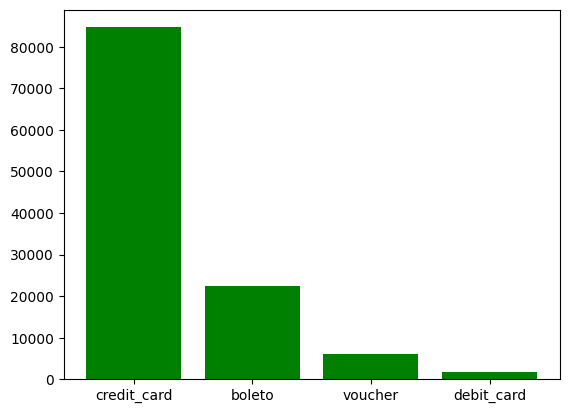

<Figure size 1200x800 with 0 Axes>

In [76]:
contagem = df['payment_type'].value_counts()
plt.bar(contagem.index, contagem.values, color='green')
plt.figure(figsize=(12,8))
plt.show()

### Esse comportamento acontece em todas as regiões do país?

Resposta: Sim. Em todas as regiões o cartão de crédito é mais usado.

In [27]:
df['customer_state'].unique()

array(['MG', 'SP', 'PB', 'ES', 'RS', 'PA', 'SC', 'GO', 'PR', 'CE', 'RN',
       'TO', 'RJ', 'SE', 'PE', 'AM', 'DF', 'MA', 'AL', 'MT', 'BA', 'RO',
       'PI', 'RR', 'MS', 'AP', 'AC'], dtype=object)

In [77]:
df_estados = df.copy()

df_estados.loc[(df_estados['customer_state'] == 'MG') | (df_estados['customer_state'] == 'SP') | (df_estados['customer_state'] == 'RJ') | (df_estados['customer_state'] == 'ES'), 'região'] = 'Sudeste'
df_estados.loc[(df_estados['customer_state'] == 'PB') | (df_estados['customer_state'] == 'CE') | (df_estados['customer_state'] == 'RN') | (df_estados['customer_state'] == 'SE')
       | (df_estados['customer_state'] == 'PE') | (df_estados['customer_state'] == 'MA') | (df_estados['customer_state'] == 'AL') | (df_estados['customer_state'] == 'BA')
       | (df_estados['customer_state'] == 'PI'),'região'] = 'Nordeste'
df_estados.loc[(df_estados['customer_state'] == 'RS') | (df_estados['customer_state'] == 'SC') | (df_estados['customer_state'] == 'PR'),'região'] = 'Sul'
df_estados.loc[(df_estados['customer_state'] == 'PA') | (df_estados['customer_state'] == 'TO') | (df_estados['customer_state'] == 'AM') | (df_estados['customer_state'] == 'RO')
       | (df_estados['customer_state'] == 'RR') | (df_estados['customer_state'] == 'AP') | (df_estados['customer_state'] == 'AC'),'região'] = 'Norte'
df_estados.loc[(df_estados['customer_state'] == 'GO') | (df_estados['customer_state'] == 'DF') | (df_estados['customer_state'] == 'MT') | (df_estados['customer_state'] == 'MS'),'região'] = 'Centro-Oeste'


df_estados

C:\Users\MARI\AppData\Local\Temp\ipykernel_18364\4221781236.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sudeste' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_estados.loc[(df_estados['customer_state'] == 'MG') | (df_estados['customer_state'] == 'SP') | (df_estados['customer_state'] == 'RJ') | (df_estados['customer_state'] == 'ES'), 'região'] = 'Sudeste'


,order_id,payment_type,payment_value,review_score,review_comment_message,order_status,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,price,região
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,1,"Produto com qualidade ruim, amassado e descasc...",delivered,teofilo otoni,MG,casa_construcao,57.0,921.0,8.0,79.80,Sudeste
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,5,não registrado,delivered,sao paulo,SP,automotivo,59.0,1274.0,2.0,17.00,Sudeste
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,5,Aprovada,delivered,sao paulo,SP,perfumaria,54.0,1536.0,2.0,56.99,Sudeste
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,não registrado,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90,Sudeste
4,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,5,não registrado,delivered,juiz de fora,MG,cama_mesa_banho,60.0,188.0,1.0,89.90,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117323,c45067032fd84f4cf408730ff5205568,credit_card,198.94,5,não registrado,delivered,foz do iguacu,PR,brinquedos,35.0,537.0,2.0,179.80,Sul
117324,0406037ad97740d563a178ecc7a2075c,boleto,363.31,5,Tudo certo!,delivered,atibaia,SP,construcao_ferramentas_iluminacao,31.0,309.0,1.0,297.00,Sudeste
117325,7b905861d7c825891d6347454ea7863f,credit_card,96.80,5,não registrado,delivered,belo horizonte,MG,papelaria,52.0,211.0,2.0,79.00,Sudeste
117327,b8b61059626efa996a60be9bb9320e10,credit_card,369.54,5,não registrado,delivered,rio de janeiro,RJ,beleza_saude,42.0,3902.0,7.0,349.00,Sudeste


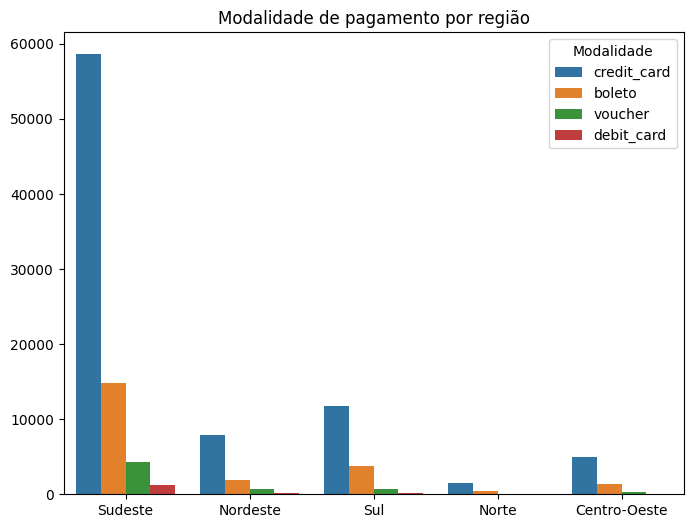

In [29]:

plt.figure(figsize=(8, 6))


sns.countplot(data = df_estados, x = 'região', hue = 'payment_type')


plt.title('Modalidade de pagamento por região')
plt.xlabel('')
plt.ylabel('')
plt.legend(title = 'Modalidade')


plt.show()

### Quais regiões compram mais obras gerais? Quais compram mais livros técnicos?
Sudeste e Sul em ambos os casos.

In [78]:
df_estados_loc = df_estados.loc[:, ["product_category_name", "região"]]
df_estados_loc 


,product_category_name,região
0,casa_construcao,Sudeste
1,automotivo,Sudeste
2,perfumaria,Sudeste
3,cama_mesa_banho,Sudeste
4,cama_mesa_banho,Sudeste
...,...,...
117323,brinquedos,Sul
117324,construcao_ferramentas_iluminacao,Sudeste
117325,papelaria,Sudeste
117327,beleza_saude,Sudeste


In [80]:

df_estados_loc_consulta_gerais= df_estados_loc[df_estados_loc["product_category_name"].str.contains('livros_interesse_geral')]
df_estados_loc_consulta_gerais

,product_category_name,região
69,livros_interesse_geral,Sudeste
360,livros_interesse_geral,Sudeste
361,livros_interesse_geral,Sudeste
463,livros_interesse_geral,Sudeste
522,livros_interesse_geral,Sudeste
...,...,...
116311,livros_interesse_geral,Sul
116557,livros_interesse_geral,Centro-Oeste
116582,livros_interesse_geral,Sudeste
116712,livros_interesse_geral,Sul


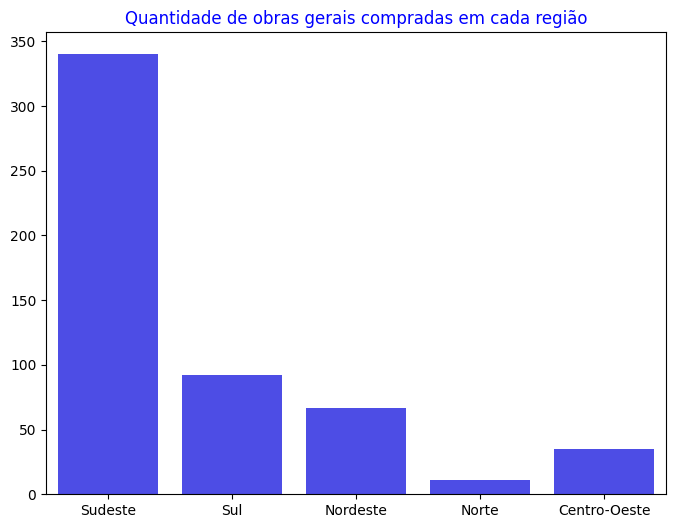

In [87]:
plt.figure(figsize=(8, 6))


sns.countplot(data = df_estados_loc_consulta_gerais, x = 'região', color ='blue', alpha=0.8)

plt.title('Quantidade de obras gerais compradas em cada região', color ='blue')
plt.xlabel('')
plt.ylabel('')

plt.show()

In [82]:
df_estados_loc_consulta_tecnicos= df_estados_loc[df_estados_loc["product_category_name"].str.contains('livros_tecnicos')]
df_estados_loc_consulta_tecnicos

,product_category_name,região
1120,livros_tecnicos,Nordeste
1410,livros_tecnicos,Nordeste
2239,livros_tecnicos,Sudeste
2252,livros_tecnicos,Sul
2275,livros_tecnicos,Sudeste
...,...,...
115998,livros_tecnicos,Nordeste
116497,livros_tecnicos,Nordeste
116506,livros_tecnicos,Sul
117115,livros_tecnicos,Sul


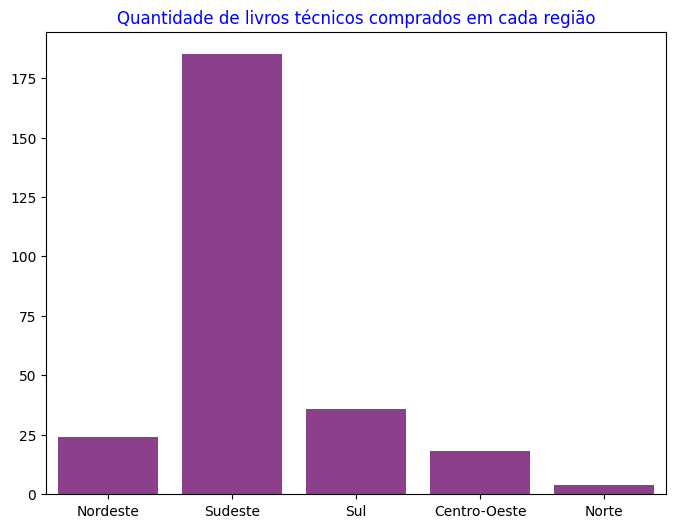

In [88]:
plt.figure(figsize=(8, 6))


sns.countplot(data = df_estados_loc_consulta_tecnicos, x = 'região', color ='purple', alpha=0.8)

plt.title('Quantidade de livros técnicos comprados em cada região', color ='blue')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Dos livros de interesse geral e técnicos, quantos são avaliados com a nota máxima (5)?
191 e 402

In [37]:
df_filtrado_tecnicos = df_estados[(df_estados['review_score'] == 5) & (df['product_category_name'] == 'livros_tecnicos')]
df_filtrado_tecnicos.shape

(191, 14)

In [38]:
df_filtrado_tecnicos = df_estados[(df_estados['review_score'] == 4) & (df['product_category_name'] == 'livros_tecnicos')]
df_filtrado_tecnicos.shape

(39, 14)

In [39]:
df_filtrado_tecnicos = df_estados[(df_estados['review_score'] == 3) & (df['product_category_name'] == 'livros_tecnicos')]
df_filtrado_tecnicos.shape

(10, 14)

In [40]:
df_filtrado_tecnicos = df_estados[(df_estados['review_score'] == 2) & (df['product_category_name'] == 'livros_tecnicos')]
df_filtrado_tecnicos.shape

(7, 14)

In [41]:
df_filtrado_tecnicos = df_estados[(df_estados['review_score'] == 1) & (df['product_category_name'] == 'livros_tecnicos')]
df_filtrado_tecnicos.shape

(20, 14)

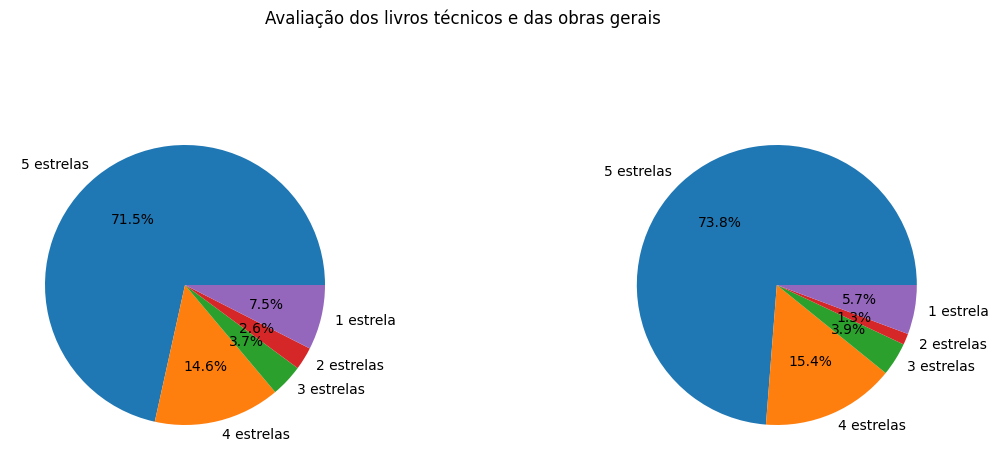

In [73]:
#ficou horroroso visualmente, mas preferi testar assim, colocando 2 gráficos na mesma figura, só para praticar mesmo

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
numero_de_linhas = df_estados_loc_consulta_tecnicos.shape[0] 
lista = [191, 39, 10, 7, 20] #lista com o número total correspondente a cada avalição, de 5 a 1
sizes = []
for n in lista:                        #calcular o percentual de cada avaliação, de 1 a 5
    valor = (n/numero_de_linhas)*100
    sizes.append(valor)
labels = ['5 estrelas', '4 estrelas', '3 estrelas', '2 estrelas', '1 estrela']


numero_de_linhas = df_estados_loc_consulta_tecnicos.shape[0] 
lista2 = [402, 84, 21, 7, 31] #lista com o número total correspondente a cada avalição, de 5 a 1
sizes2 = []
for n in lista2:                        #calcular o percentual de cada avaliação, de 1 a 5
    valor = (n/numero_de_linhas)*100
    sizes2.append(valor)
labels2 = ['5 estrelas', '4 estrelas', '3 estrelas', '2 estrelas', '1 estrela']

#Criando os dois gráficos dentro da figura
plt.suptitle('Avaliação dos livros técnicos e das obras gerais')
ax1.pie(sizes, labels=labels, autopct = '%0.1f%%') 

ax2.pie(sizes2, labels=labels2, autopct = '%0.1f%%') 

plt.show()

Text(0.5, 1.0, 'Avaliação dos livros técnicos e gerais')

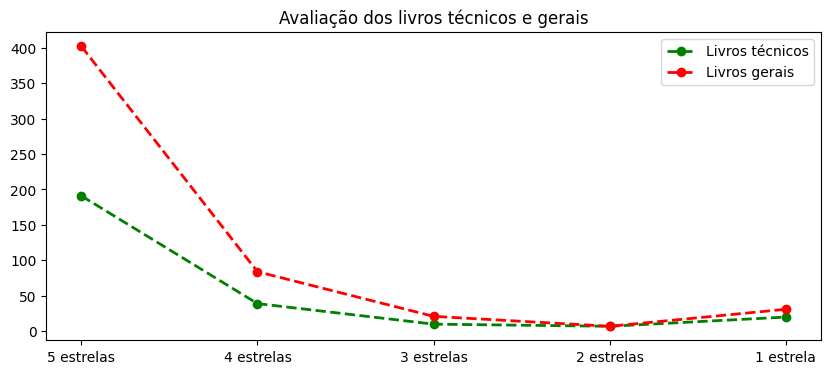

In [58]:
#alternativa de visualização menos feia
y = [191, 39, 10, 7, 20]
x = ['5 estrelas', '4 estrelas', '3 estrelas', '2 estrelas', '1 estrela']
y_geral = [402, 84, 21, 7, 31]
plt.figure(figsize=(10,4))
plt.plot(x, y, color='green', linestyle='--', marker='o', linewidth=2, label='Livros técnicos')
plt.plot(x, y_geral, color='red', linestyle='--', marker='o', linewidth=2, label='Livros gerais')


plt.legend()
plt.title('Avaliação dos livros técnicos e gerais')

In [46]:
df_filtrado = df_estados[(df_estados['review_score'] == 5) & (df['product_category_name'] == 'livros_interesse_geral')]
df_filtrado.shape

(402, 14)

In [47]:
df_filtrado = df_estados[(df_estados['review_score'] == 4) & (df['product_category_name'] == 'livros_interesse_geral')]
df_filtrado.shape

(84, 14)

In [48]:
df_filtrado = df_estados[(df_estados['review_score'] == 3) & (df['product_category_name'] == 'livros_interesse_geral')]
df_filtrado.shape

(21, 14)

In [49]:
df_filtrado = df_estados[(df_estados['review_score'] == 2) & (df['product_category_name'] == 'livros_interesse_geral')]
df_filtrado.shape

(7, 14)

In [50]:
df_filtrado = df_estados[(df_estados['review_score'] == 1) & (df['product_category_name'] == 'livros_interesse_geral')]
df_filtrado.shape

(31, 14)

### Exportanto para csv

In [84]:
df.to_csv("exercicio.csv")